**Daily Challenge: Pokemon Win Prediction Analysis**
pokemon.csv: Contains stats like HP, Attack, Type 1, Legendary, etc., for 800+ Pokemon.
combats.csv: Records 50,000 battle outcomes between Pokemon.

Data Preparation

Load and merge pokemon.csv and combats.csv.
Fix missing values:
Fill the missing Name for Pokemon #62 (Primeape).
Handle NaN values in Type 2 (mark as “None” if missing).
Calculate each Pokemon’s win percentage using the combat data.

Exploratory Analysis & Visualization
Create a correlation matrix to identify relationships between stats (HP, Attack, Speed) and win percentage.
Plot a Seaborn pairplot or PairGrid for stats vs. win percentage.
Analyze the top 10 Pokemon by win percentage and their stats.

Machine Learning
Split data into training/testing sets (80/20 split).
Train and evaluate 3 regression models (e.g., Linear Regression, Random Forest, XGBoost) to predict win percentage.
Compare model performance using Mean Absolute Error (MAE).

#1. DATA PREPARATION#

Importation des bibliothèques

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

Chargement des fichiers

In [5]:
combats = pd.read_csv('combats.csv')
pokemon = pd.read_csv('pokemon.csv')

Titres des colonnes des datasets

In [6]:
print(combats.columns)
print(pokemon.columns)

Index(['First_pokemon', 'Second_pokemon', 'Winner'], dtype='object')
Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


Aperçu des premiers éléments des datasets

In [7]:
pd.read_csv('combats.csv')

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [8]:
pd.read_csv('pokemon.csv')

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


Compositions des datasets
'Combats' : 50000 rows (combats) x 3 columns (1st pokemon, 2nd pokemon, winner)
'Pokemon' : 800 rows x 12 columns (name, type 1, type 2, combat features, etc.)

DATA CLEANING
#FIX MISSING VALUES#

In [9]:
#Fill the missing Name for Pokemon #62 (Primeape).

pokemon.loc[pokemon['#'] == 62, 'Name'] = 'Primeape'

In [10]:
#Handle NaN values in Type 2 (mark as “None” if missing).

pokemon['Type 2'] = pokemon['Type 2'].fillna("None")

#Calculate each Pokemon’s win percentage using the combat data.

In [11]:
pokemon = pd.read_csv("pokemon.csv")
combats = pd.read_csv("combats.csv")

In [12]:
# 2. Calculer win_counts si besoin
win_counts = combats['Winner'].value_counts().rename("Wins")

# 3. S'assurer que les IDs sont bien des entiers
pokemon['#'] = pokemon['#'].astype(int)
win_counts.index = win_counts.index.astype(int)

# 4. Créer un DataFrame à partir de la Series
wins_df = win_counts.reset_index()
wins_df.columns = ['Pokemon_ID', 'Wins']

# 5. Joindre avec le DataFrame pokemon.csv pour avoir les noms
pokemon_names = pokemon[['#', 'Name']].rename(columns={'#': 'Pokemon_ID'})
wins_df = wins_df.merge(pokemon_names, on='Pokemon_ID', how='left')

# 6. Trier par nombre de victoires (facultatif)
wins_df = wins_df.sort_values(by='Wins', ascending=False)

# 7. Afficher les 10 premiers
print(wins_df.head(10))

   Pokemon_ID  Wins                Name
0         163   152              Mewtwo
1         438   136           Infernape
2         154   136          Aerodactyl
3         428   134             Jirachi
4         314   133             Slaking
5         432   133  Deoxys Speed Forme
6         214   130             Murkrow
7         394   130          Mega Absol
8         249   128       Mega Houndoom
9         427   127       Mega Rayquaza


In [ ]:
#calculer le pourcentage de victoires (win percentage)

In [14]:
# 1. Reprendre win_counts (victoires)
win_counts = combats['Winner'].value_counts().rename("Wins").astype(int)

# 2. Compter les apparitions dans les combats (peu importe gagnant ou perdant)
first_counts = combats['First_pokemon'].value_counts()
second_counts = combats['Second_pokemon'].value_counts()

# 3. Total combats = somme des deux
total_combats = first_counts.add(second_counts, fill_value=0).rename("Total_combats").astype(int)

# 4. Préparer le DataFrame avec index = Pokémon ID
stats_df = pd.concat([win_counts, total_combats], axis=1).fillna(0).astype(int)

# 5. Ajouter défaites et taux de victoire
stats_df['Defeats'] = stats_df['Total_combats'] - stats_df['Wins']
stats_df['Win_percentage'] = (stats_df['Wins'] / stats_df['Total_combats']) * 100

# 6. Ajouter les noms des Pokémon
pokemon['#'] = pokemon['#'].astype(int)
pokemon_names = pokemon[['#', 'Name']].rename(columns={'#': 'Pokemon_ID'})
stats_df = stats_df.reset_index().rename(columns={'index': 'Pokemon_ID'})
stats_df = stats_df.merge(pokemon_names, on='Pokemon_ID', how='left')

# 7. Trier par nombre de combats ou de victoires
#stats_df = stats_df.sort_values(by='Total_combats', ascending=False)
stats_df = stats_df.sort_values(by='Win_percentage', ascending=False)

# 8. Afficher
print(stats_df[['Name', 'Wins', 'Defeats', 'Total_combats', 'Win_percentage']].head(10))


                        Name  Wins  Defeats  Total_combats  Win_percentage
10           Mega Aerodactyl   127        2            129       98.449612
47                   Weavile   116        3            119       97.478992
23    Tornadus Therian Forme   121        4            125       96.800000
50             Mega Beedrill   115        4            119       96.638655
2                 Aerodactyl   136        5            141       96.453901
16              Mega Lopunny   124        5            129       96.124031
20                  Greninja   122        5            127       96.062992
35  Meloetta Pirouette Forme   118        5            123       95.934959
30             Mega Mewtwo Y   119        6            125       95.200000
56             Mega Sharpedo   114        6            120       95.000000


#This table gives the win_percentage of the ten top Pokemons.#

#2. EXPLORATORY ANALYSIS & VISUALIZATION#

Create a correlation matrix to identify relationships between stats (HP, Attack, Speed) and win percentage.

In [15]:
#Etape 1 Fusionner pokemon.csv avec stats_df
# 1. S'assurer que les types sont corrects
pokemon['#'] = pokemon['#'].astype(int)

# 2. Fusionner stats_df avec les colonnes de stats du pokédex
# Garde seulement les colonnes numériques pertinentes
base_stats = pokemon[['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].rename(columns={'#': 'Pokemon_ID'})

# 3. Fusionner avec stats_df qui contient Win_percentage
full_df = stats_df.merge(base_stats, on='Pokemon_ID', how='left')


In [33]:
print(base_stats)
print(full_df)

     Pokemon_ID  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0             1  45      49       49       65       65     45
1             2  60      62       63       80       80     60
2             3  80      82       83      100      100     80
3             4  80     100      123      122      120     80
4             5  39      52       43       60       50     65
..          ...  ..     ...      ...      ...      ...    ...
795         796  50     100      150      100      150     50
796         797  50     160      110      160      110    110
797         798  80     110       60      150      130     70
798         799  80     160       60      170      130     80
799         800  80     110      120      130       90     70

[800 rows x 7 columns]
     Pokemon_ID  Wins  Total_combats  Defeats  Win_percentage  \
0           155   127            129        2       98.449612   
1           513   116            119        3       97.478992   
2           704   121            125 

In [18]:
#Etape 2 Calculer la matrice de corrélation

# 4. Sélection des colonnes numériques à corréler
corr_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win_percentage']
correlation_matrix = full_df[corr_columns].corr()

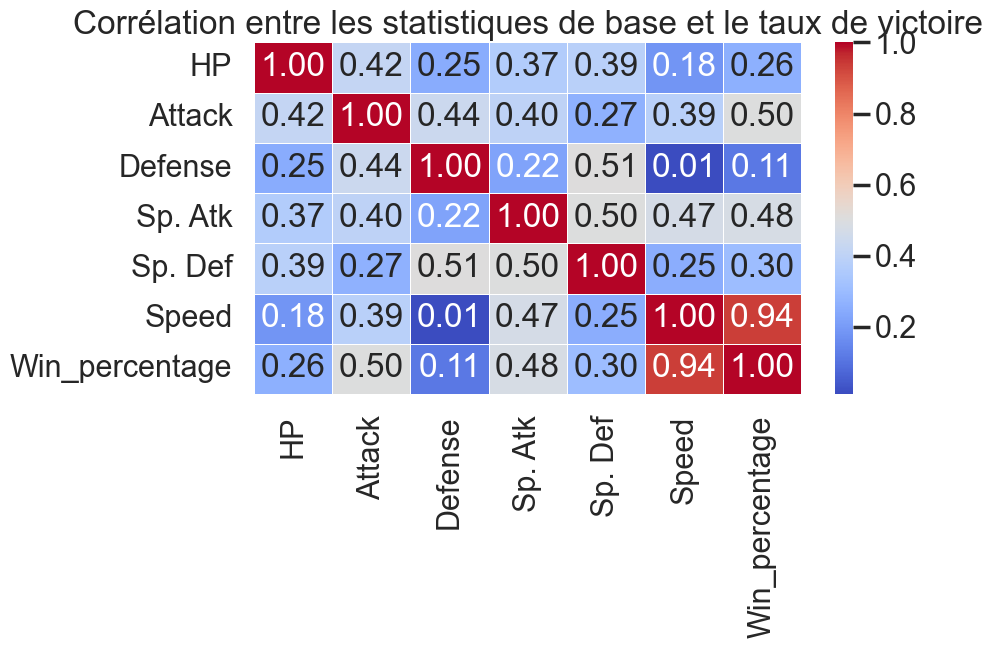

In [19]:
#Etape 3 Afficher avec une heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Corrélation entre les statistiques de base et le taux de victoire")
plt.tight_layout()
plt.show() 

📊 Interprétation
🔴 Valeurs proches de +1 : forte corrélation positive (ex : plus d’attaque → plus de winrate)

🔵 Valeurs proches de -1 : forte corrélation négative

⚪ Valeurs proches de 0 : pas de relation claire

In this correlation matrix, it is quite clear that SPEED is the main feature leading to victory:
- with a 0.94 correlation, it is very close to 1 which means a strong positive correlation
- Attack and Sp. Atk respectively rank second and third with a 0.50 and 0.48 correlation.

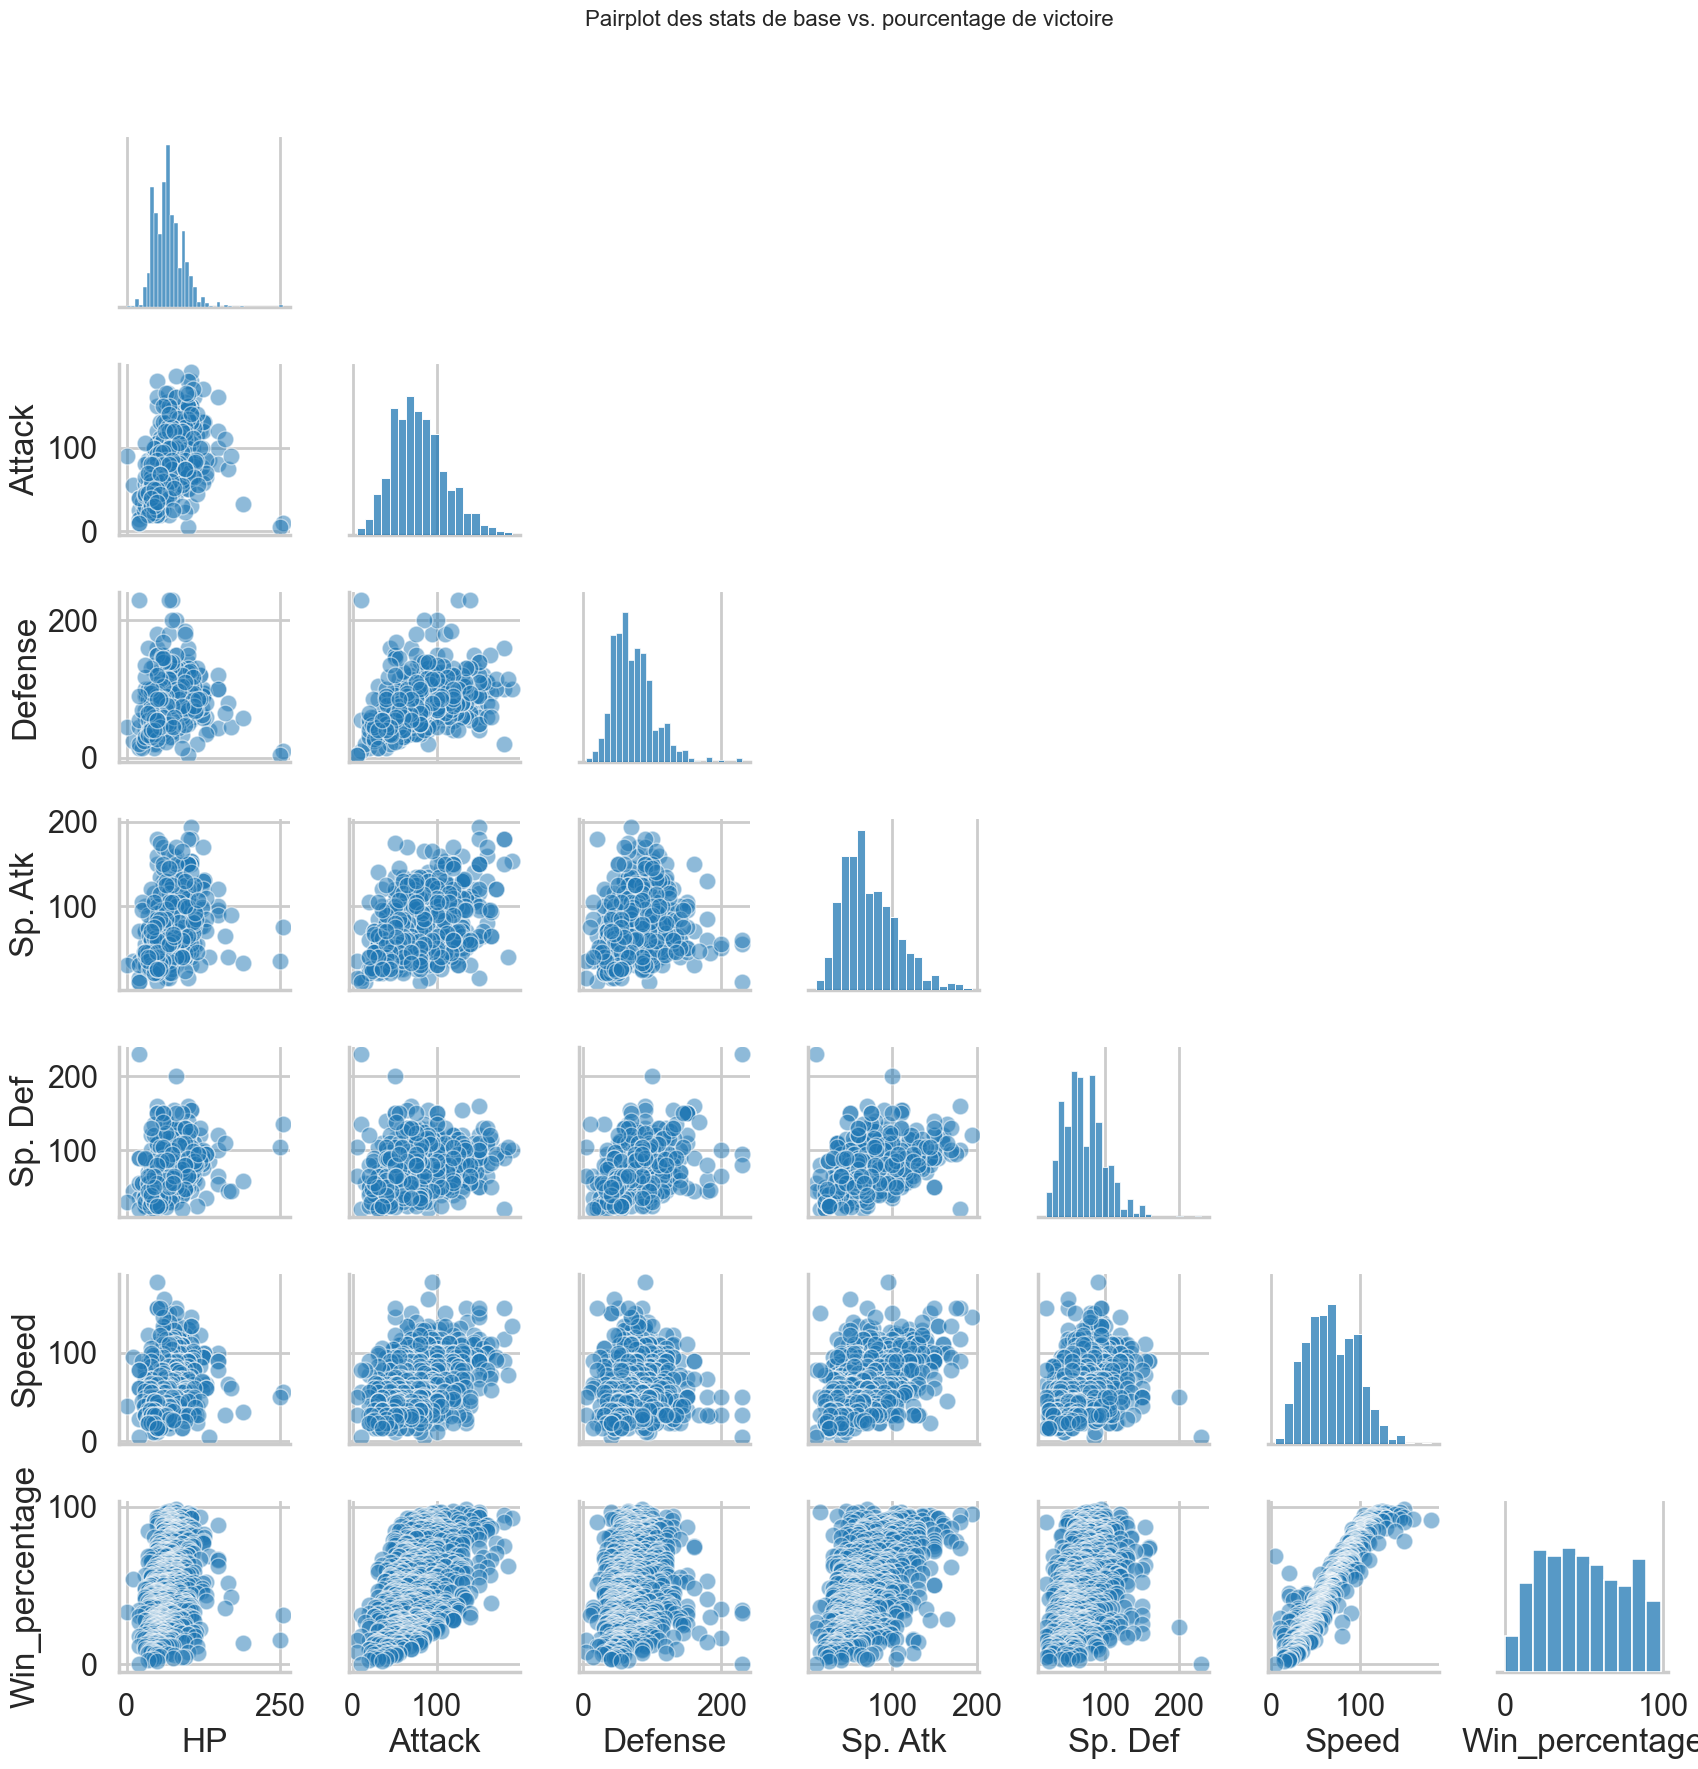

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: filter out Pokémon with too few battles to reduce noise
filtered_df = full_df[full_df['Total_combats'] >= 10]

# List of columns to include
plot_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win_percentage']

# Plot
sns.pairplot(filtered_df[plot_columns], corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot des stats de base vs. pourcentage de victoire", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


2. Using sns.PairGrid 

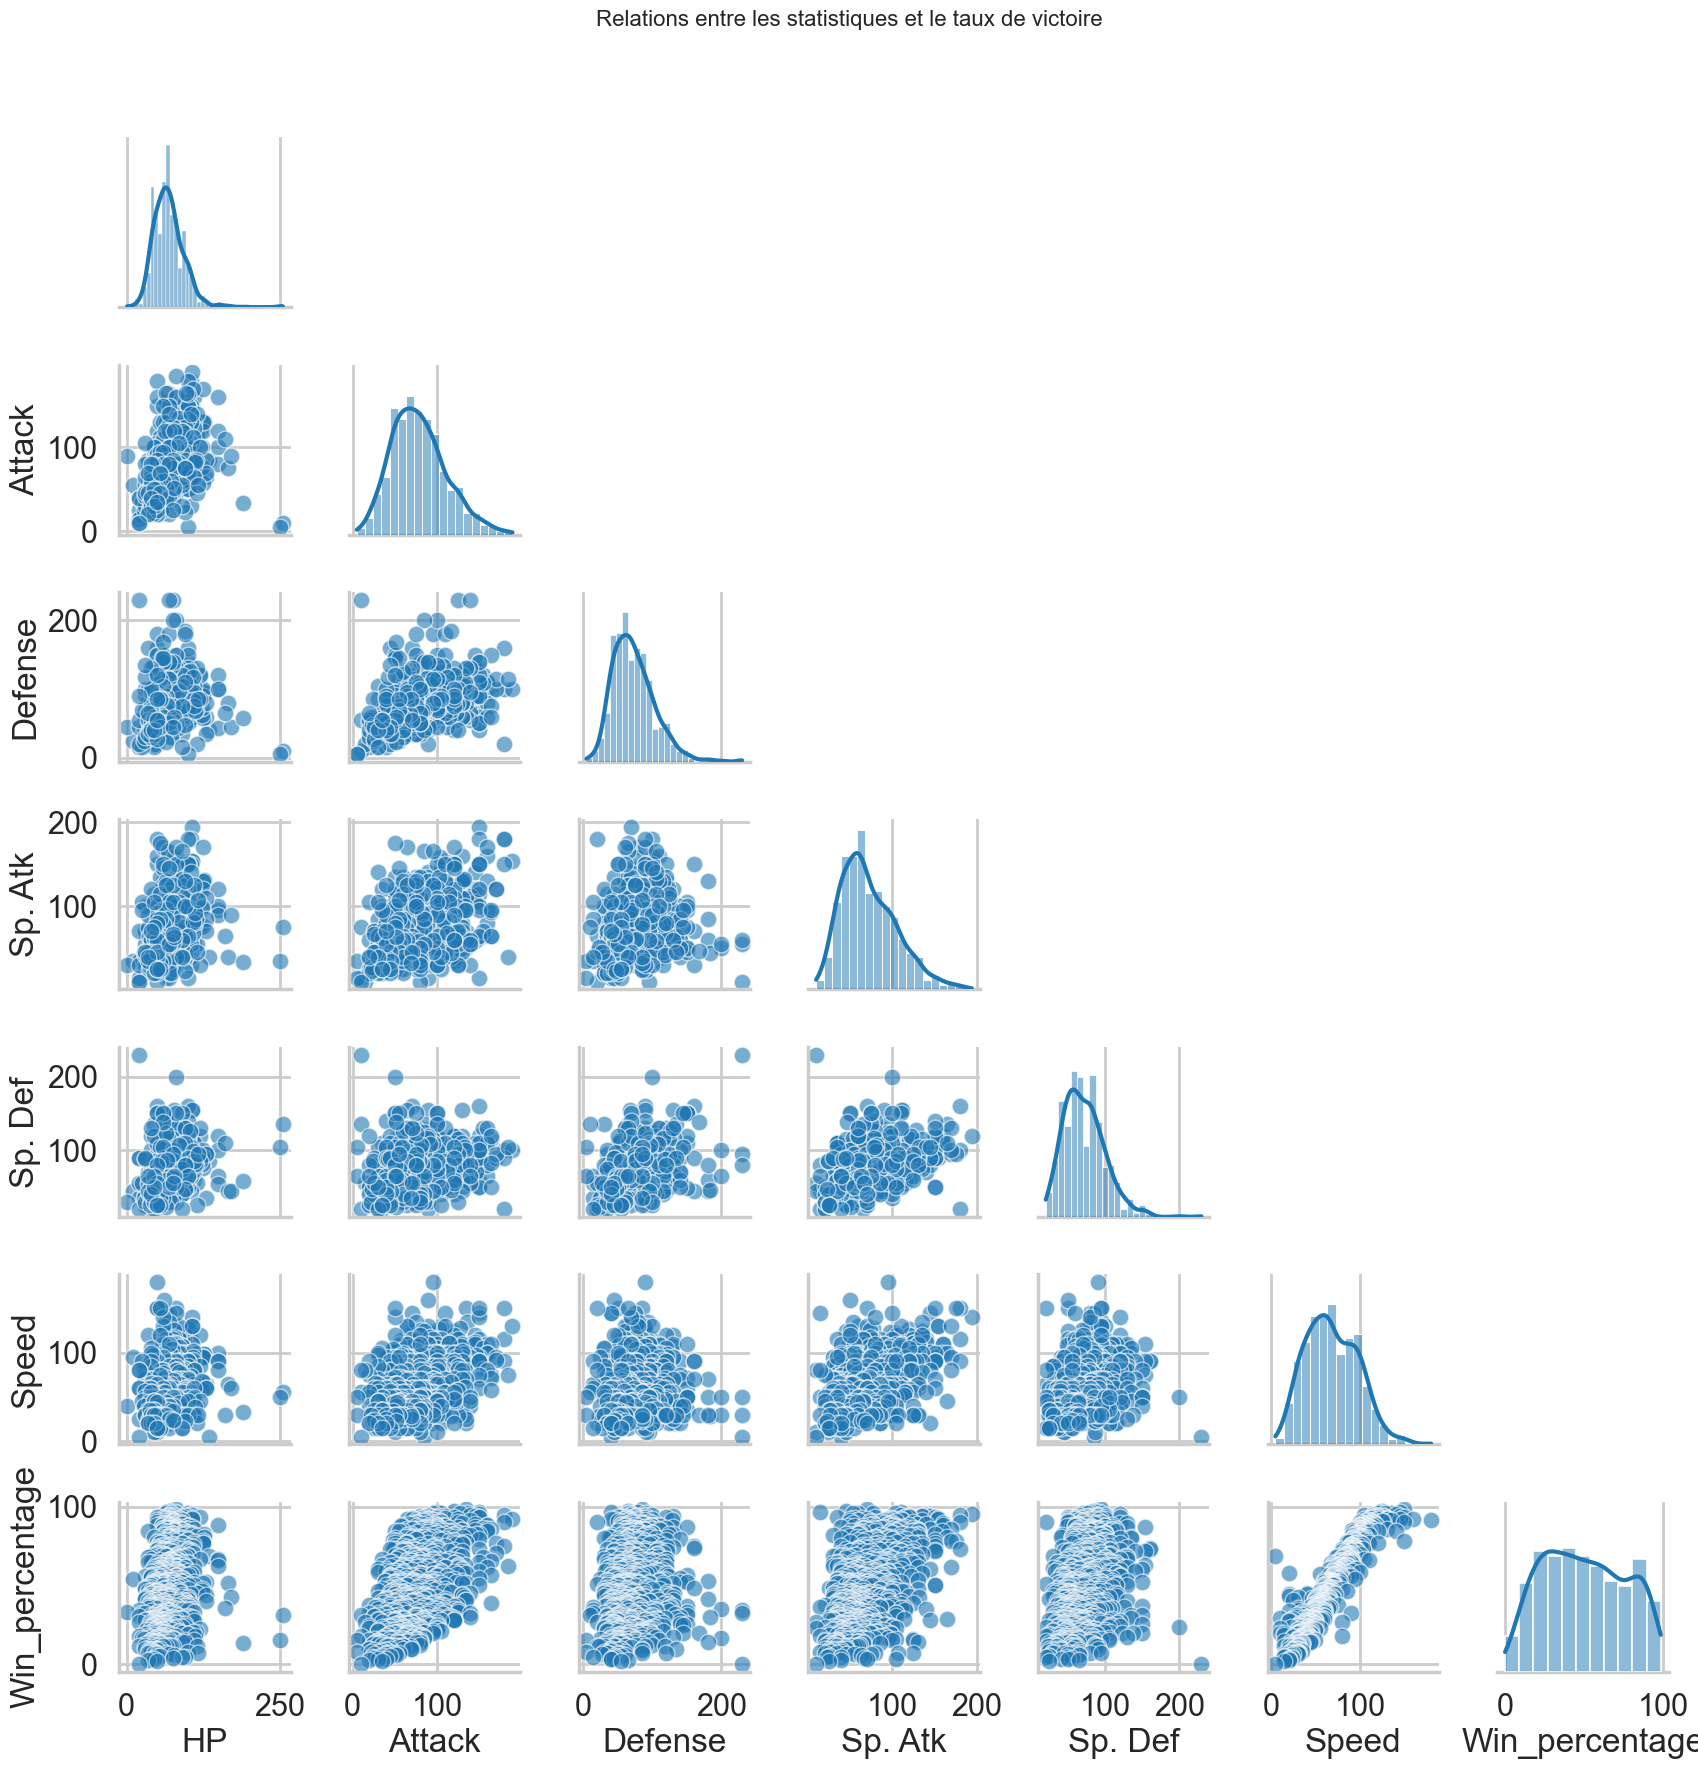

In [21]:
# Create PairGrid
g = sns.PairGrid(filtered_df[plot_columns], corner=True)

# Scatterplot in lower triangle
g.map_lower(sns.scatterplot, alpha=0.6)

# Histograms on the diagonal
g.map_diag(sns.histplot, kde=True)

# Optional: Add regression lines in lower
#g.map_lower(sns.regplot, scatter_kws={'alpha':0.5})

plt.suptitle("Relations entre les statistiques et le taux de victoire", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


To analyze the top 10 Pokemon by win percentage and their stats.
Filter the top 10 Pokémon based on Win_percentage.

Plot their base stats (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) using a pairplot or barplot for a more focused view.

Optionally, highlight these top Pokémon in the plots.

In [22]:
# 1. Filter the Top 10 Pokémon by Win Percentage

# Sort the DataFrame by Win_percentage and select the top 10 Pokémon
top_10 = full_df.sort_values(by='Win_percentage', ascending=False).head(10)

# Show relevant columns
top_10_stats = top_10[['Name', 'Win_percentage', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
print(top_10_stats)

                       Name  Win_percentage   HP  Attack  Defense  Sp. Atk  \
0           Mega Aerodactyl       98.449612   80     135       85       70   
1                   Weavile       97.478992   70     120       65       45   
2    Tornadus Therian Forme       96.800000   79     100       80      110   
3             Mega Beedrill       96.638655   65     150       40       15   
4                Aerodactyl       96.453901   80     105       65       60   
5              Mega Lopunny       96.124031   65     136       94       54   
6                  Greninja       96.062992   72      95       67      103   
7  Meloetta Pirouette Forme       95.934959  100     128       90       77   
8             Mega Mewtwo Y       95.200000  106     150       70      194   
9             Mega Sharpedo       95.000000   70     140       70      110   

   Sp. Def  Speed  
0       95    150  
1       85    125  
2       90    121  
3       80    145  
4       75    130  
5       96    135  
6

#This table gives the statistics of the 10 top POKEMONS regarding HP, Attack, Defense, SP. Atk, SP. Def, and Speed.#

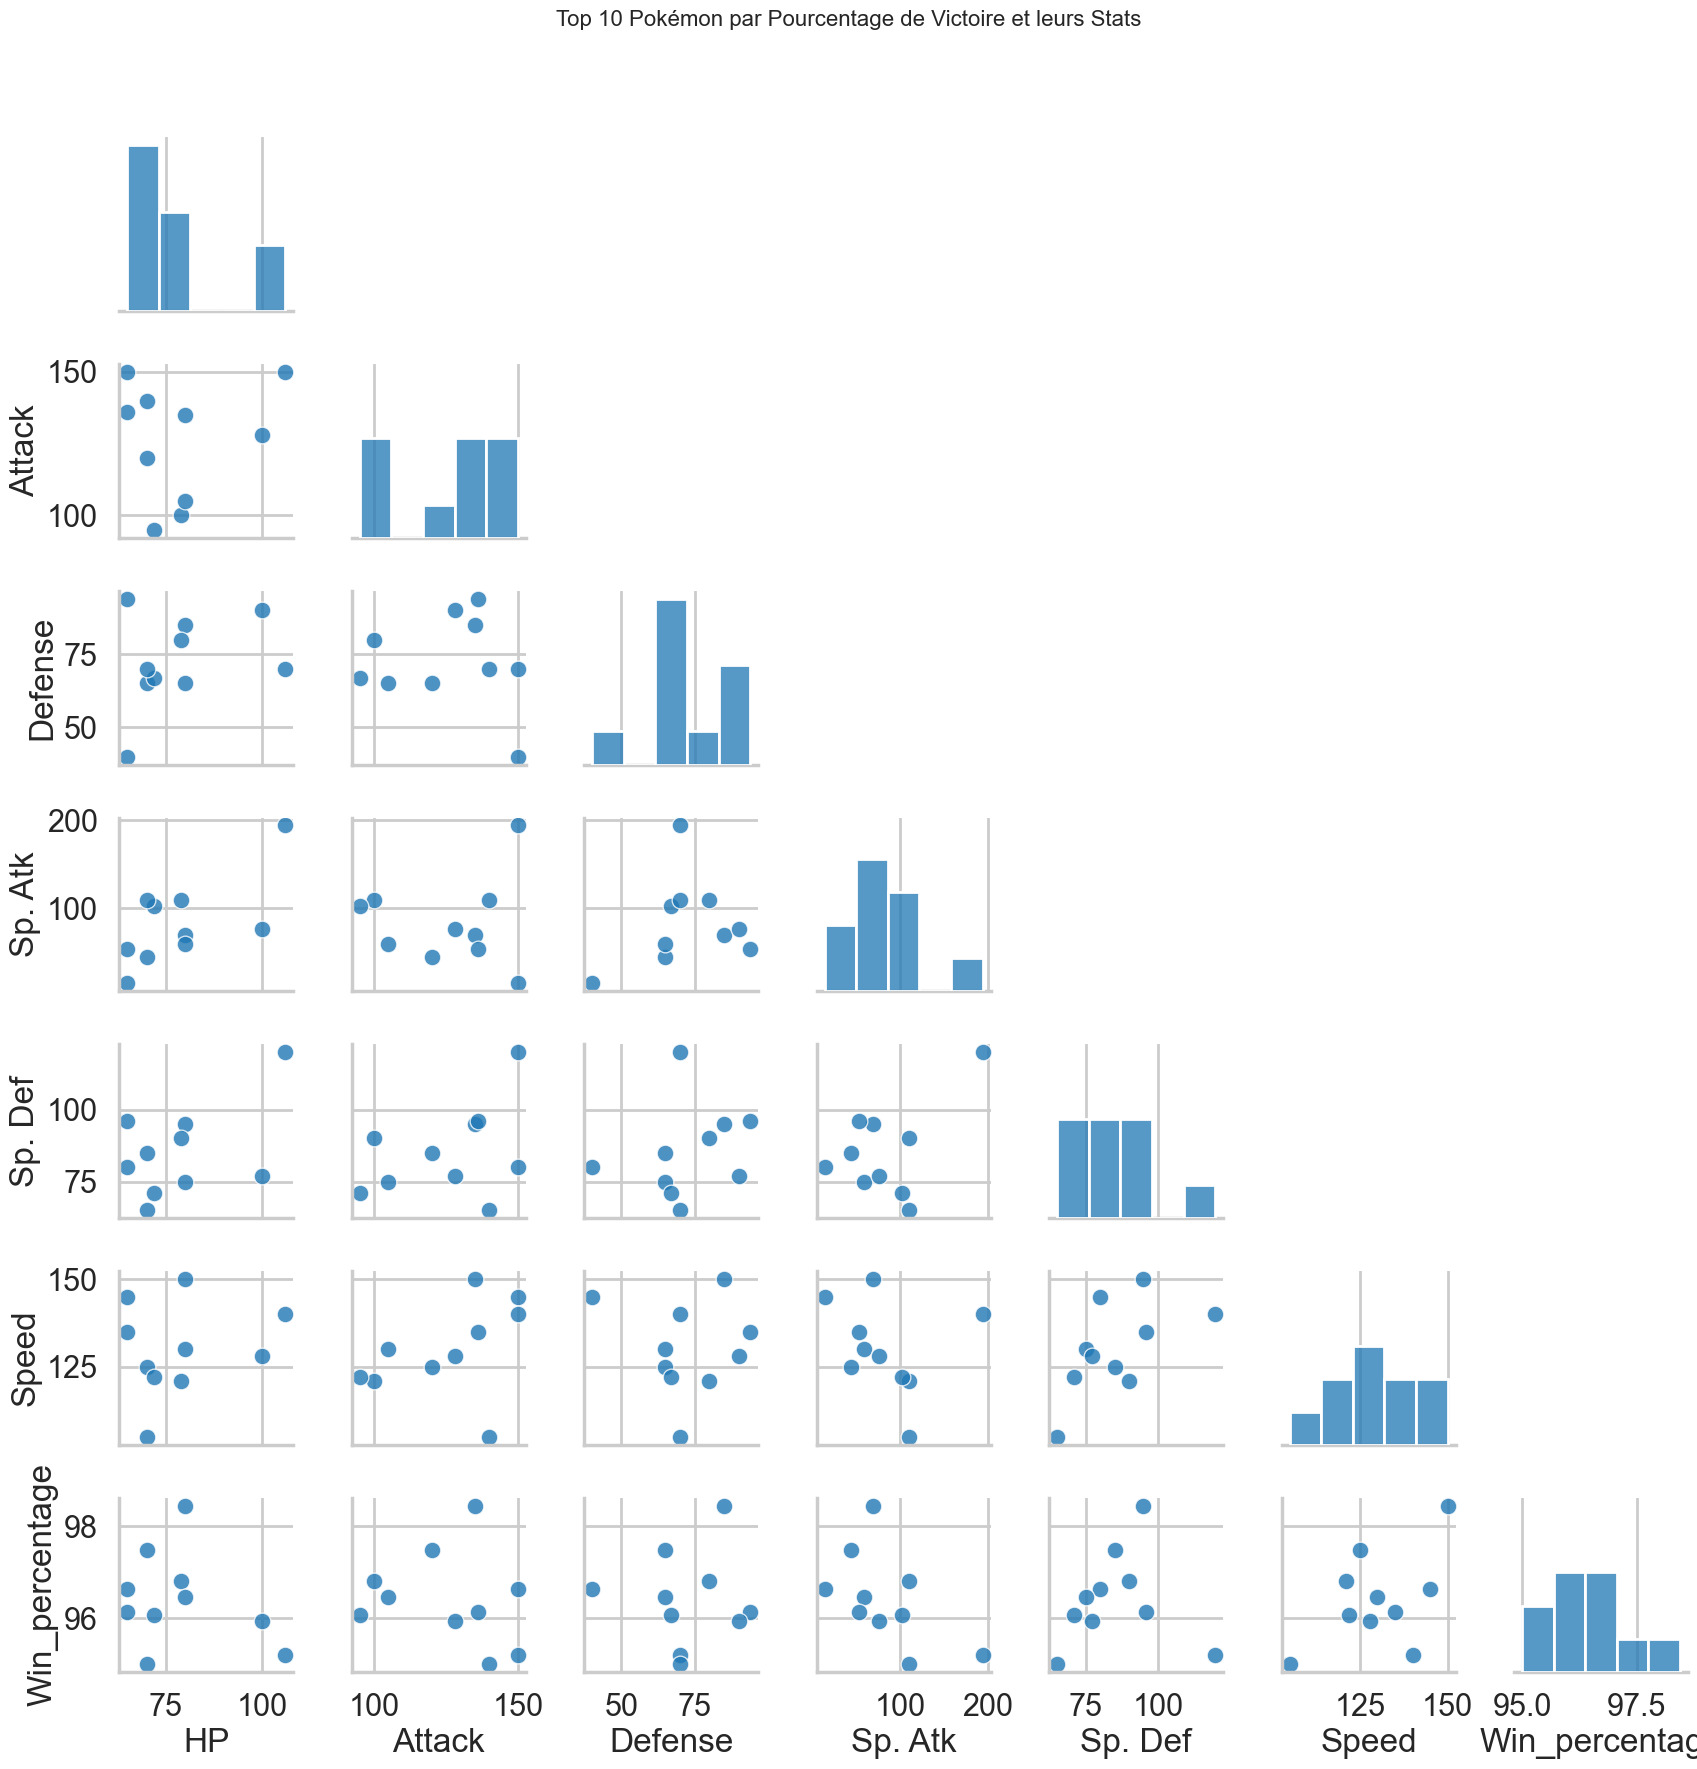

In [23]:
# 2. Visualize the Stats with Pairplot

import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to include in the pairplot
plot_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win_percentage']

# Filter the top 10 Pokémon
top_10_filtered = top_10[plot_columns]

# Pairplot for top 10 Pokémon
sns.pairplot(top_10_filtered, kind="scatter", corner=True, plot_kws={'alpha': 0.8})
plt.suptitle("Top 10 Pokémon par Pourcentage de Victoire et leurs Stats", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


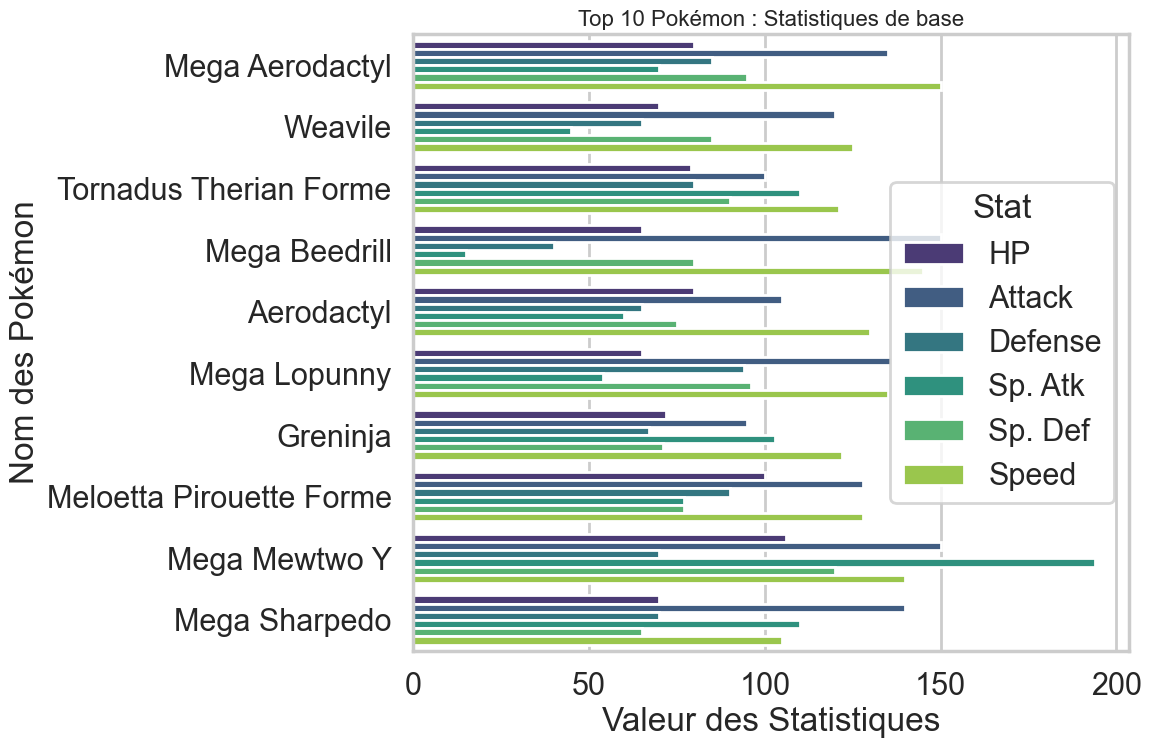

In [24]:
# 3. Visualize Stats in a Barplot (for each Pokémon)

# Melting the top_10 DataFrame for easier plotting
top_10_melted = top_10[['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].melt(id_vars=['Name'],
                                                                                                      var_name='Stat',
                                                                                                      value_name='Value')

# Plotting with seaborn barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Value', y='Name', hue='Stat', data=top_10_melted, palette='viridis')
plt.title("Top 10 Pokémon : Statistiques de base", fontsize=16)
plt.xlabel("Valeur des Statistiques")
plt.ylabel("Nom des Pokémon")
plt.tight_layout()
plt.show()


When viewing this barplot, it appears quite clearly that for most of the ten Pokemons, especially for Mega Aerodactyl who ranks first, but also for the first eight pokemons, Speed is the one and foremost criteria, the overwhelming Feature that is relevant for victory.
Attack ranks second in this concern,
Sp. Def ranks third for most Pokemons.*
So, SPEED is the main feature that insures victory for most POKEMONS.

#3 Machine learning #

Use Linear Regression, Random Forest, and XGBoost to predict the win percentage (Win_percentage) of each Pokémon based on their base stats ###(HP, Attack, Speed, etc.).

Steps to Follow
Prepare the dataset – We will use the Pokémon stats (HP, Attack, Speed, etc.) along with the win percentage (Win_percentage) from the previous calculations.
Train/Test Split – We'll split the dataset into training and testing sets.
Linear Regression – A basic model to start with.
Random Forest – A more complex model that can capture non-linear relationships.
XGBoost – A powerful gradient boosting model.
Evaluate – Evaluate performance with Mean Absolute Error (MAE) or R².

In [25]:
#1 Prepare the Dataset - Ensure your data has both the Pokémon stats and win percentage.#

# 1. Fusionner stats_df avec les stats des Pokémon
base_stats = pokemon[['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].rename(columns={'#': 'Pokemon_ID'})

# 2. Fusionner stats_df avec les résultats de victoire (Win_percentage)
full_df = stats_df.merge(base_stats, on='Pokemon_ID', how='left')

# 3. Sélectionner les features (statistiques) et la target (win_percentage)
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
target = 'Win_percentage'

# 4. Créer X (features) et y (target)
X = full_df[features]
y = full_df[target]

In [26]:
#2 Train/Test Split - dataset split into training (80%) and testing (20%) sets.

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#3. Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr:.3f}, R²: {r2_lr:.3f}")

Linear Regression - MAE: 5.711, R²: 0.917


In [28]:
# 4. Random Forest 
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.3f}, R²: {r2_rf:.3f}")

Random Forest - MAE: 4.167, R²: 0.956


In [29]:
# 5. XGBoost - a more powerful algorithm:

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb:.3f}, R²: {r2_xgb:.3f}")

XGBoost - MAE: 4.743, R²: 0.938


In [31]:
# 6. Compare the Results - comparison of the Mean Absolute Error (MAE) and R² score of each model.

# Compare the results
results = {
    "Linear Regression": {"MAE": mae_lr, "R²": r2_lr},
    "Random Forest": {"MAE": mae_rf, "R²": r2_rf},
    "XGBoost": {"MAE": mae_xgb, "R²": r2_xgb},
}

results_df = pd.DataFrame(results).T
print(results_df)

                        MAE        R²
Linear Regression  5.710558  0.916993
Random Forest      4.166884  0.955831
XGBoost            4.743398  0.938374


#RESULTS OF THE 3 REGRESSION MODELS#
FOR MAE AND R²

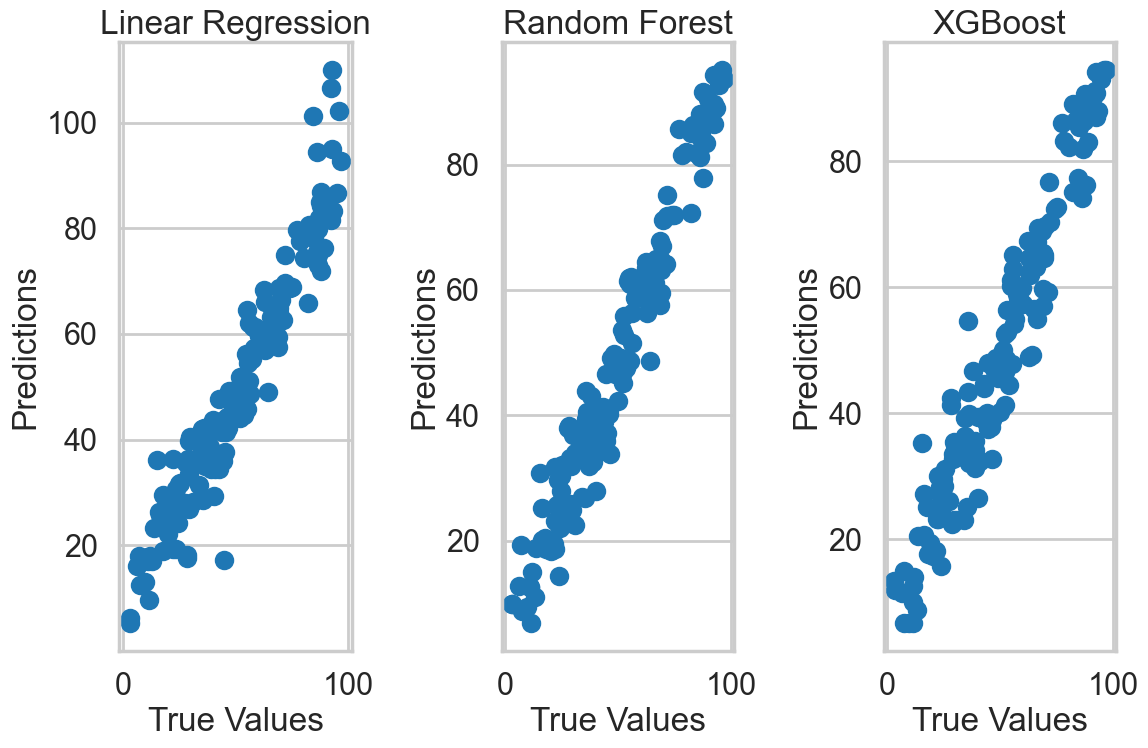

In [32]:
# 7. Visualizing Predictions

plt.figure(figsize=(12, 8))

# Plot for Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr)
plt.title("Linear Regression")
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Plot for Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf)
plt.title("Random Forest")
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Plot for XGBoost
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgb)
plt.title("XGBoost")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.tight_layout()
plt.show()


#Results Interpretation#

R²: Higher R² means the model is able to explain more of the variance in the win percentage.
- So Random Forest provides the best previsions concerning the variance in the win percentage (0.955831), 0.916993 for linear regression, and 0.938374 for XGBoost. 

MAE: Lower MAE means better predictions in terms of absolute error.
- Random Forest also has the lowest MAE (4.166884), 5.710558 for linear regression, and 4.743398 for XGBoost.